<a href="https://colab.research.google.com/github/yumeniown/Software-Engineering-IT-Leaders-of-the-Future/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D1%8D%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D1%8B_%D0%B8_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D0%B7%D0%BD%D0%B0%D1%87%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лекция 1.8. Статистика: Статистические эксперименты и проверка значимости
  

In [ ]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
# cwd = os.getcwd()
# print(cwd)

Mounted at /content/drive


### Немного теории

Статистика очень тесно связана с машинным обучением. Этот раздел математики помогает ответить, какие из признаков важны, позволяет выдвигать и проверять гипотезы и идеи. Статистика лежит в основе алгоритмов машинного обучения, методов разведывательного анализа данных.

Данные, собранные в ходе исследования каких-то явлений или процессов, сами по себе не очень информативны. Чтобы извлечь из данных какие-то полезные идеи, применяется описательная статистика.

In [ ]:
df = pd.read_csv('drive/MyDrive/lect1_8.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
df.shape

(129971, 13)

In [ ]:
1 2 3 4 5 6 7

In [ ]:
df.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

Мера центральной тенденции — это число, которое описывает так называемое «среднее» признака. Мера центральной тенденции может рассчитываться по-разному в зависимости от типа признака или от его распределения.
Для расчёта этих описательных статистик в Python мы будем пользоваться библиотекой statistics. Она предоставляет готовые функции для вычисления математической статистики для числовых данных.
* statistics.mean()
* statistics.median()
* statistics.median_low()
* statistics.median_high()
* statistics.mode()

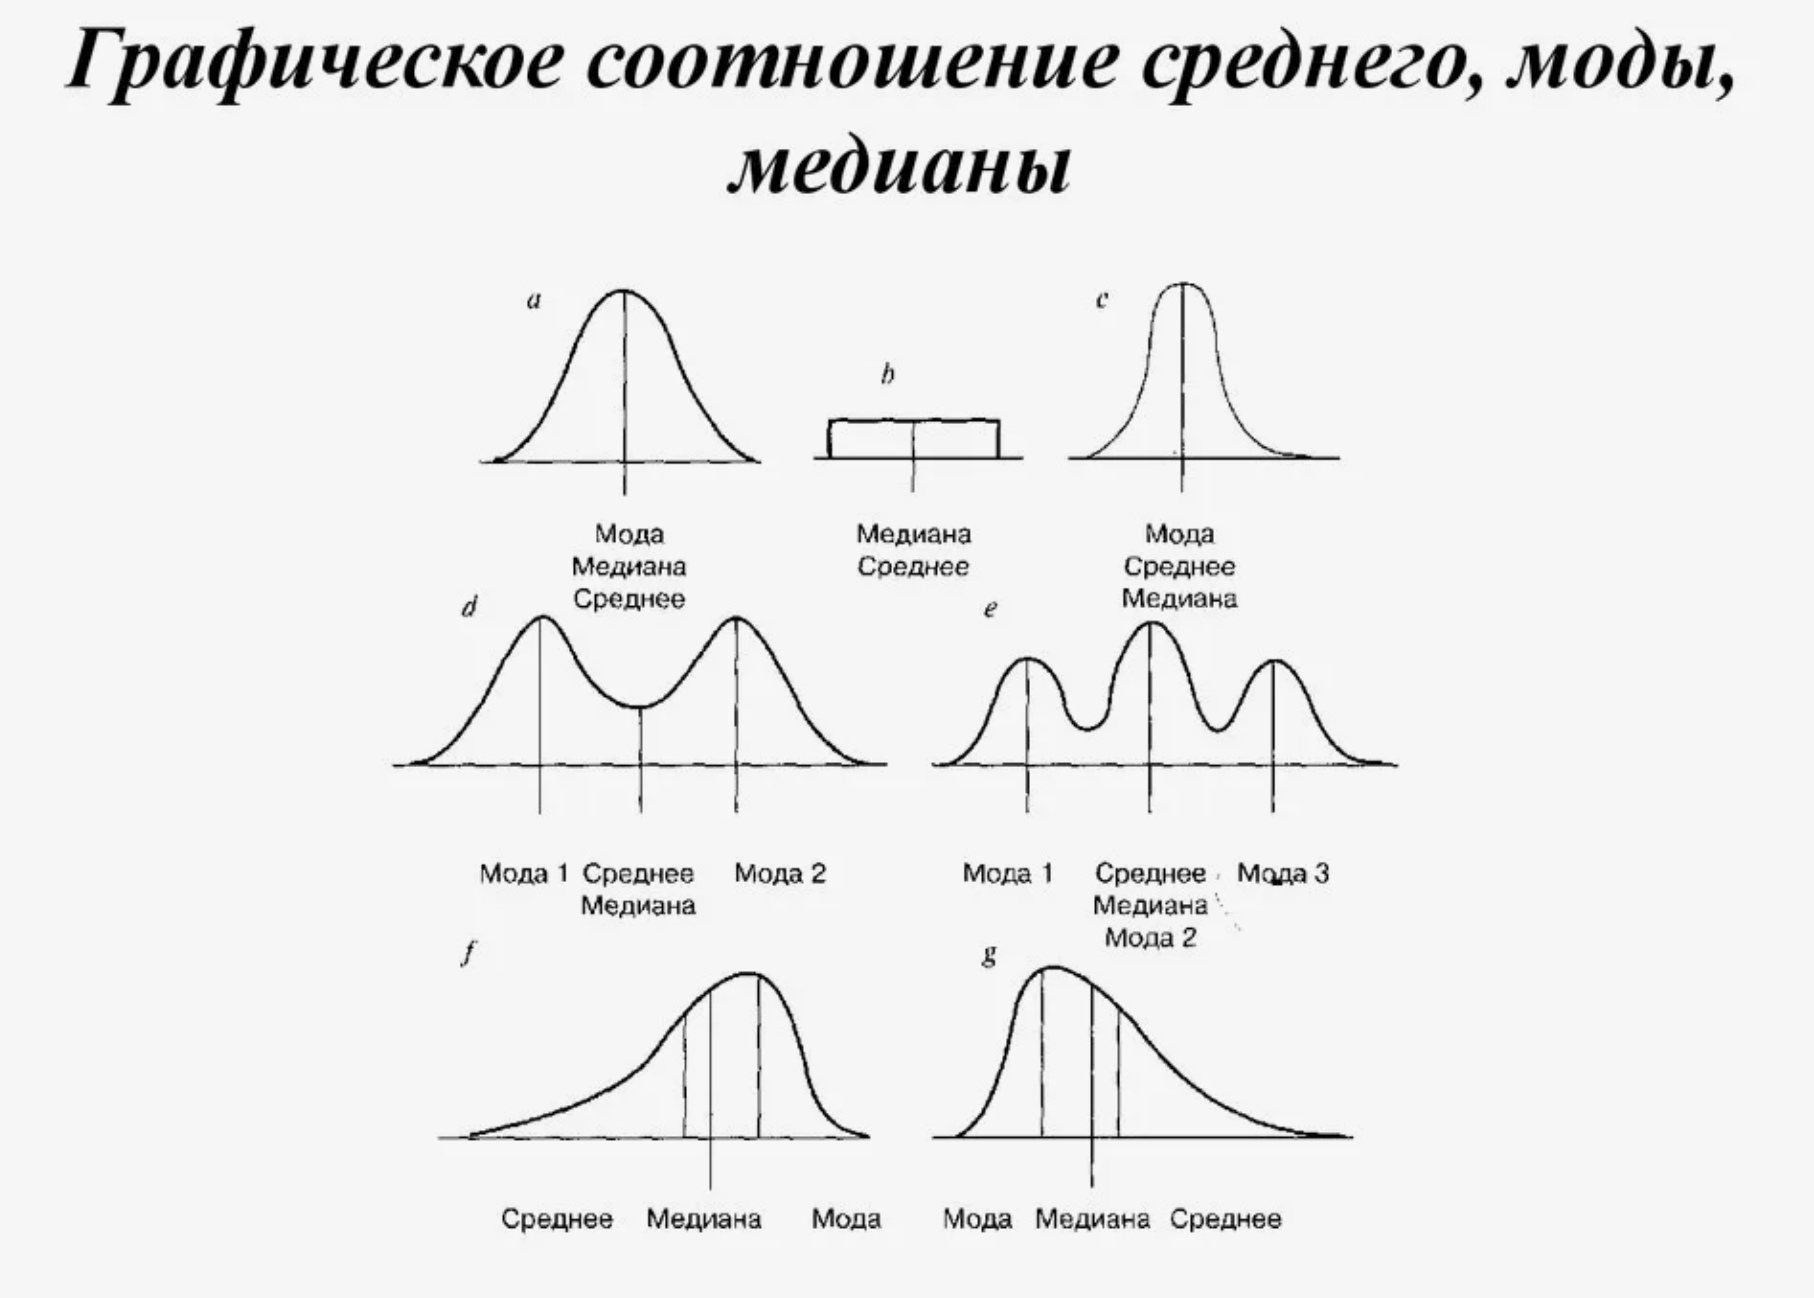

In [ ]:
import statistics

In [ ]:
statistics.mean(df.price)

35.363389129985535

In [ ]:
statistics.median(df.price)

28.0

In [ ]:
statistics.mode(df.price)

35.363389129985535

In [ ]:
statistics.median_low(df.price)

28.0

In [ ]:
statistics.mean(df.points)

88.44713820775404

In [ ]:
statistics.median(df.points)

88

In [ ]:
statistics.mode(df.points)

88

In [ ]:
points

**Корреляция** — статистическая связь двух и более переменных. При изменении значения одной из переменных происходит закономерное изменение другой или других величин.

Мерой связи величин, мерой корреляции является коэффициент корреляции. Он может принимать значение от -1 до +1.

* Отрицательная корреляция, коэффициент корреляции < 0 говорит об обратной связи между переменными. При обратной связи увеличение одной из величин ведёт к закономерному уменьшению другой (других) величин.

* Положительная корреляция, коэффициент корреляции > 0 говорит о прямой связи между переменными. При прямой связи увеличение одной из величин ведёт к закономерному увеличению другой (других) величин.

* Коэффициент корреляции = 0 говорит о том, что переменные независимы друг от друга, по крайней мере линейно, но это вовсе не значит, что между ними нет какой-то более сложной взаимосвязи. Это достаточно редкое явление, которое может встретиться на конкретном наборе данных.

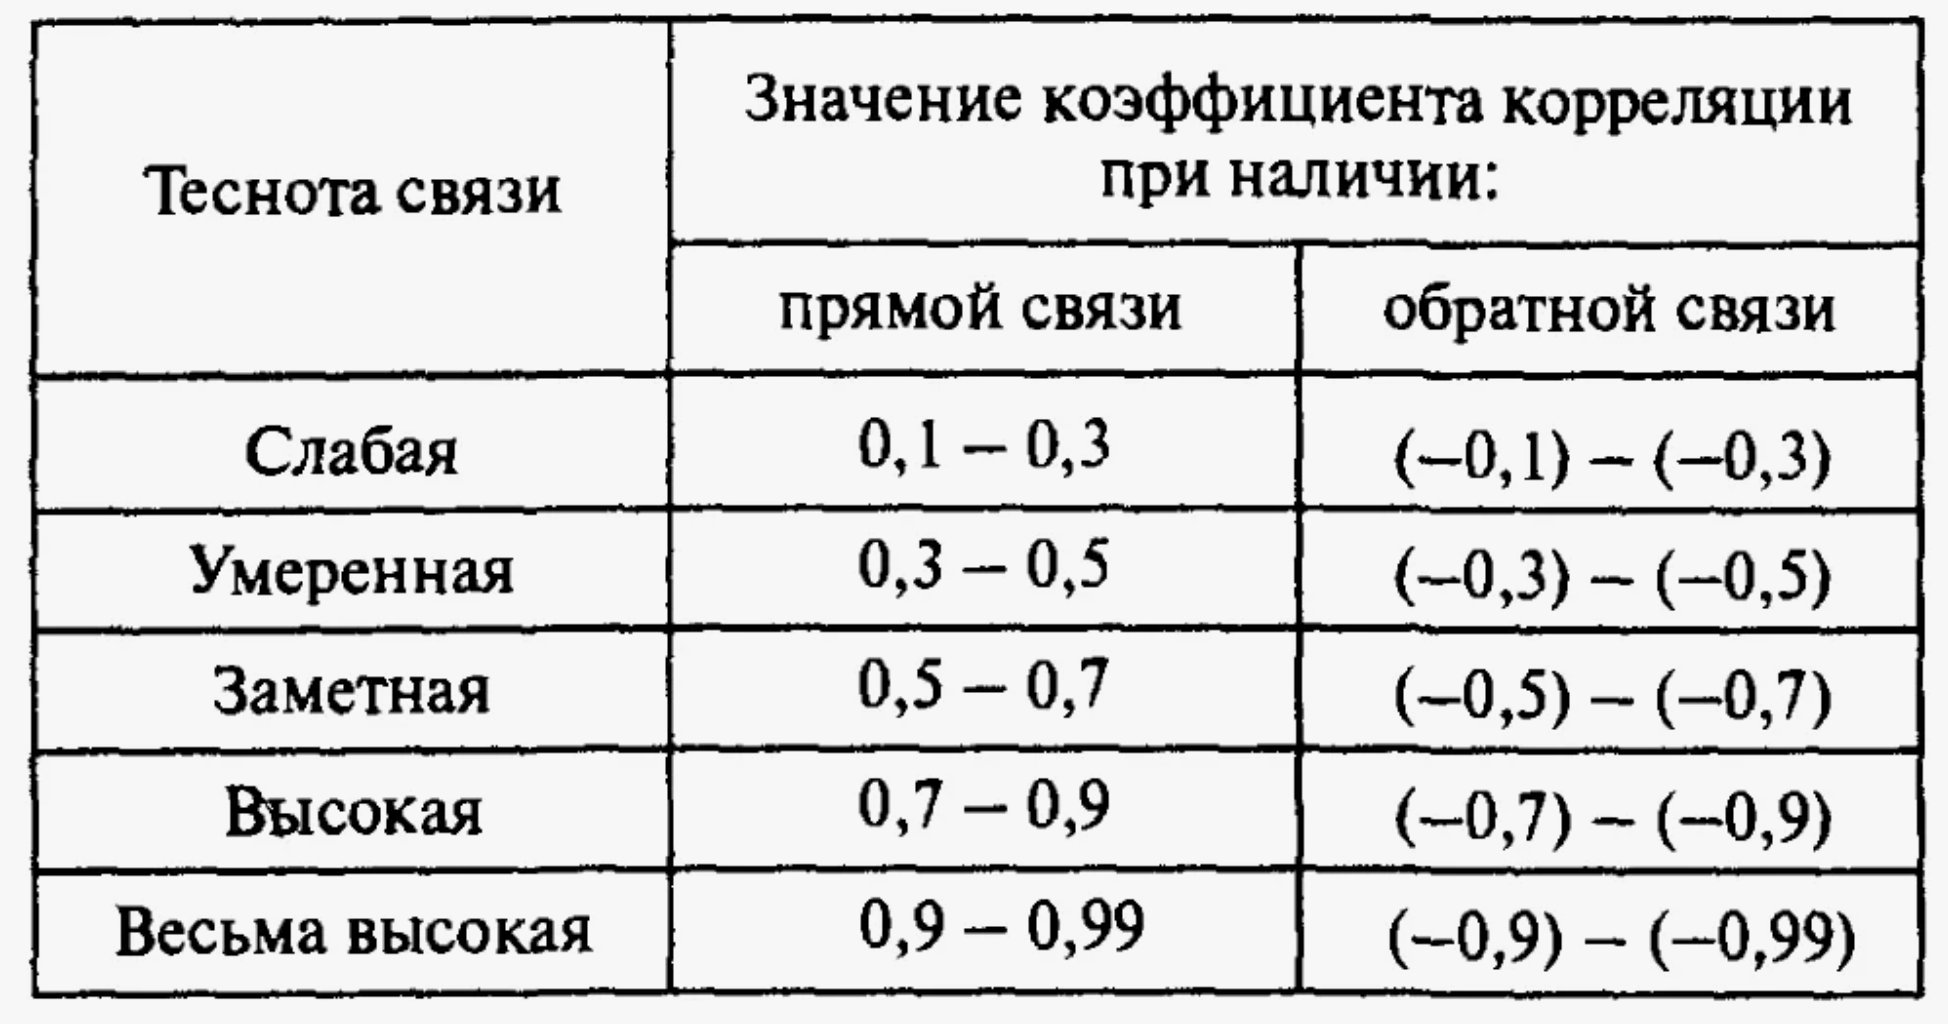

Понимание корреляции приводит нас к понятию мультиколлинеарности(от 0.7) — такой сильной зависимости переменных друг от друга, что она затрудняет анализ и оценку будущей модели машинного обучения.

In [ ]:
df.corr()

ValueError: could not convert string to float: 'Italy'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.9+ MB


In [ ]:
df[['points', 'price']].corr()

,points,price
points,1.000000,0.402137
price,0.402137,1.000000


Корреляция и причинно-следственная связь — это понятия, которые чаще всего ошибочно приравниваются друг к другу. Понимание корреляции важно для разведывательного анализа и помогает делать правильные выводы.

Аргумент method указывает на название используемого метода расчёта корреляции: 'pearson' — корреляция Пирсона, 'kendall' — корреляция Кендалла, 'spearman' — корреляция Спирмена. Каждый метод может быть применён для разных типов данных.
* Корреляция между непрерывными признаками, которые имеют близкое к нормальному распределение, может быть рассчитана с использованием стандартной корреляции Пирсона.
* Коэффициент корреляции Спирмена используется для вычисления взаимосвязей между категориальными переменными.
* корреляция Кендала предусмотрена для нахождения взаимосвязей между категориальными переменными



In [ ]:
df[['points', 'price']].corr(method='spearman')

,points,price
points,1.000000,0.581095
price,0.581095,1.000000


In [ ]:
df.corr(numeric_only=True)

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.007124,0.004652
points,0.007124,1.000000,0.402137
price,0.004652,0.402137,1.000000


Иногда мы можем применить ранговую корреляцию и для числовых переменных, которые распределены ненормально или если между ними существует нелинейная связь.

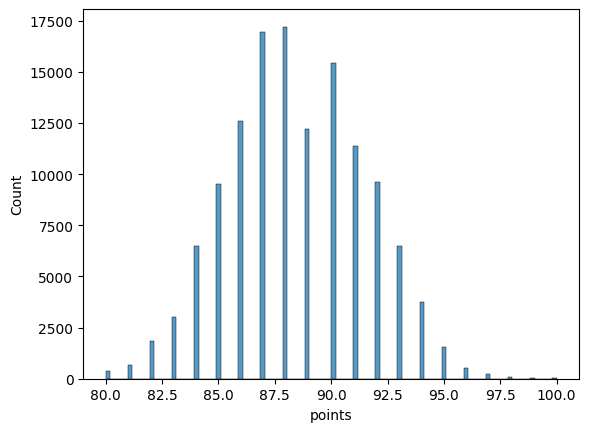

In [ ]:
sns.histplot(data=df, x='points');

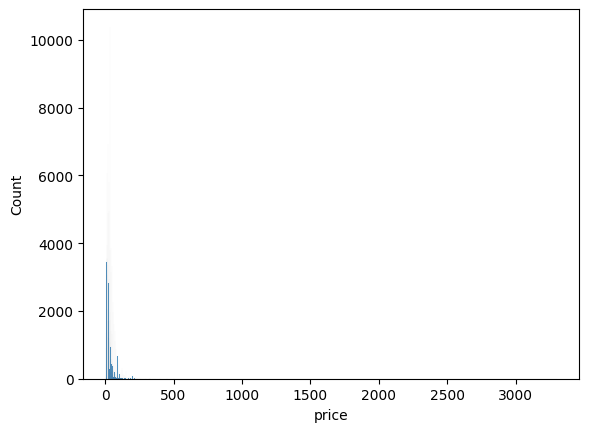

In [ ]:
sns.histplot(data=df, x='price');

In [ ]:
df[['points', 'price']].corr(method='kendall')

,points,price
points,1.000000,0.433498
price,0.433498,1.000000


Корреляция Кендалла более устойчива к ошибкам и выбросам в данных. Это значит, что её можно применить до очистки данных, чтобы выявить взаимосвязи заранее. Применение в этом случае корреляции Спирмена, как и корреляции Пирсона, не вызовет ошибки, но, скорее всего, некорректность расчёта приведёт к неверным выводам.

* корреляция Мэтьюса — мера силы связи между бинарными переменными. Часто коэффициент используется для оценки качества моделей, ответы которых также бинарны

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
x = [+1, -1, +1, +1]
y = [+1, +1, +1, -1]

matthews_corrcoef(x, y)

-0.3333333333333333

**Мультиколлинеарность**. Сильно скоррелированные признаки сообщают для модели одну и ту же информацию. Поэтому для обучения не нужно использовать их все. Часть из них необходимо удалить из набора данных.

Данные содержат 150 экземпляров ириса, по 50 экземпляров трех видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

* sepal length — длина наружной доли околоцветника;
* sepal width — ширина наружной доли околоцветника;
* petal length — длина внутренней доли околоцветника;
* petal width — ширина внутренней доли околоцветника.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
# Будем исследовать признаки, которые могут влиять на variety — sepal.length, sepal.width, petal.length, petal.width.
iris = pd.DataFrame(data= np.c_[iris['data']],
                     columns= iris['feature_names'])

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.corr(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [ ]:
# Как мы выяснили из тепловой карты корреляций, у нас есть три пары сильно скоррелированных признаков
# : sepal. ength и petal width, petal length и sepal length, petal width и petal length.

# Начнём с самого высокого коэффициента корреляции в паре признаков: petal width и petal length 0,96.
# Удалим любой признак из этой пары, например petal width, так как он коррелирует ещё и с признаком sepal length

iris = iris.drop(['petal width (cm)'], axis=1)

# Однако второй признак petal length из этой пары также сильно коррелирует с признаком sepal. ength

iris = iris.drop(['petal length (cm)'], axis=1)

In [ ]:
iris.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
iris.corr(numeric_only=True)

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


Как понять, какой признак необходимо удалить из пары скоррелированных признаков?

Вы можете удалить любой признак из пары. Однако вы можете оставить в наборе данных тот признак, который легче будет использовать в дальнейшем. Например, для него не понадобится округление или нормализация.

Большая часть статистики касается взаимосвязи между наблюдениями. Эта наука помогает нам интерпретировать данные путём предположения конкретной структуры или взаимосвязи данных и использования статистических методов для подтверждения или же опровержения этого предположения. Такое предположение называется гипотезой.
* если я посмотрю всю лекцию, я буду профессором статистики

Статистической называют гипотезу о распределении вероятностей, лежащем в основе наблюдаемой выборки данных. Важно переформулировать статистическую гипотезу как нулевую () и альтернативную () гипотезы, чтобы иметь возможность проверить её математически.
* нулевая гипотеза () — это предсказание отсутствия связи между интересующими вас переменными (хотя иногда нулевая гипотеза может звучать другим образом).
* Альтернативная гипотеза () — это, как правило, гипотеза, предсказывающая взаимосвязь между переменными.  

* Нулевая гипотеза: средний рост жителей Дании составляет 170 см.

* Альтернативная гипотеза: средний рост жителей Дании больше 170 см.

--
* Если данные подтверждают альтернативную гипотезу, мы отклоняем нулевую гипотезу и принимаем альтернативную гипотезу.

* Если данные не подтверждают альтернативную гипотезу, мы сохраняем нулевую гипотезу.

**Уровень значимости** - это неопределённость, которую мы принимаем при отклонении нулевой гипотезы в проверке гипотез.

Уровень значимости - это процентная вероятность случайного ошибочного вывода.

Типичные уровни значимости:
* 0.1(10%)
* 0.05(5%)
* 0.01(1%)

Более низкий уровень значимости означает, что доказательства в данных должны быть более убедительными, чтобы отвергнуть нулевую гипотезу.

Не существует "правильного" уровня значимости - он лишь констатирует неопределенность вывода.

* Примечание:  5% уровень значимости означает, что когда мы отклоняем нулевую гипотезу: Мы ожидаем отклонить истинную нулевую гипотезу в 5 случаях из 100.

* Ошибка I (первого)  рода: отклонение нулевой гипотезы, если она верна.

* Ошибка II (второго)  рода: принятие нулевой гипотезы, если она ложна.
--

пример. Вы решили провести тест: на глаз измерить рост ваших одногруппников. По этим наблюдениям вы можете допустить два типа ошибок.
* Ошибка I рода (ложноположительный результат): результат теста говорит, что средний рост девушек отличается от среднего роста юношей, но на самом деле это не так.

* Ошибка II рода (ложноотрицательный): результат теста говорит, что средний рост обеих подгрупп одинаковый, но на самом деле нет.

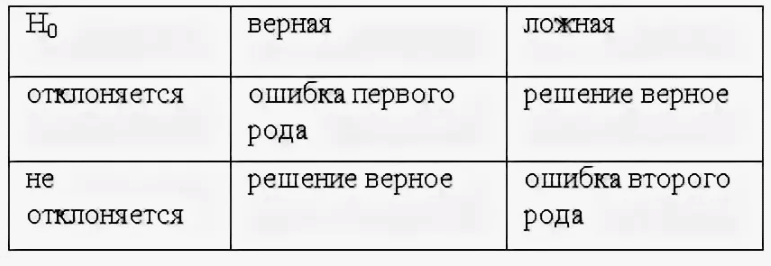

я болею

H0: я не болею

H1 я болею

В статистике p-значения обычно используются при проверке гипотез для t-тестов, тестов хи-квадрат, регрессионного анализа, дисперсионного анализа и множества других статистических методов.

**P-значение** — это вероятность наблюдения выборочной статистики, которая по крайней мере столь же экстремальна, как и ваша выборочная статистика, при условии, что нулевая гипотеза верна.

--

Например, предположим, что завод заявляет, что производит шины, средний вес которых составляет 200 фунтов. Аудитор выдвигает гипотезу о том, что истинный средний вес шин, произведенных на этом заводе, отличается от 200 фунтов, поэтому он проводит проверку гипотезы и обнаруживает, что p-значение теста равно 0,04. Вот как интерпретировать это p-значение:

Если фабрика действительно производит шины со средним весом 200 фунтов, то 4% всех аудитов получат эффект, наблюдаемый в выборке, или больше из-за случайной ошибки выборки. Это говорит нам о том, что получение выборочных данных, которые сделал аудитор, было бы довольно редким, если бы завод действительно производил шины, средний вес которых составлял 200 фунтов.

В зависимости от уровня значимости, используемого в этой проверке гипотезы, аудитор, скорее всего, отклонит нулевую гипотезу о том, что истинный средний вес шин, произведенных на этом заводе, действительно составляет НЕ 200 фунтов. И принимает альтернативную. Выборочные данные, полученные им в ходе аудита, не очень согласуются с нулевой гипотезой.

Небольшой итог:
* Для определения того, что связь между двумя или более переменными вызвана чем-то иным, чем случайность, используется понятие статистической значимости p-value
* P-value — это вероятность обнаружения наблюдаемых результатов, когда нулевая гипотеза верна.
* Статистическая значимость произвольна: она зависит от порога, называемого уровнем значимости   (альфа).  
* Уровень значимости  — это фиксированная вероятность ошибочного отклонения истинной нулевой гипотезы, то есть вероятность ошибки I рода.

---

* Если p-value вашего теста ниже уровня значимости, это означает, что ваши результаты статистически значимы и согласуются с альтернативной гипотезой.
* Если p-value выше уровня значимости, ваши результаты считаются статистически незначимыми и мы не можем отвергнуть нулевую гипотезу.


Уровень значимости используется как порог для принятия решений. Чем ниже , тем лучше. Перед тем как начать проверку гипотезы, вы обычно выбираете уровень ошибки, который вы готовы принять. Например, если , это означает, что мы можем взять на себя 5 %-ный риск.

Но если мы хотим быть на 100 % уверенными, что ошибки нет, и зададим ?

Мы должны учитывать  (бета), вероятность ошибки II рода. Если  определяет риск ложноотрицательного результата, то   — это вероятность не допустить ошибки II рода. Такая вероятность называется «мощность теста». Чем ниже , тем выше мощность.

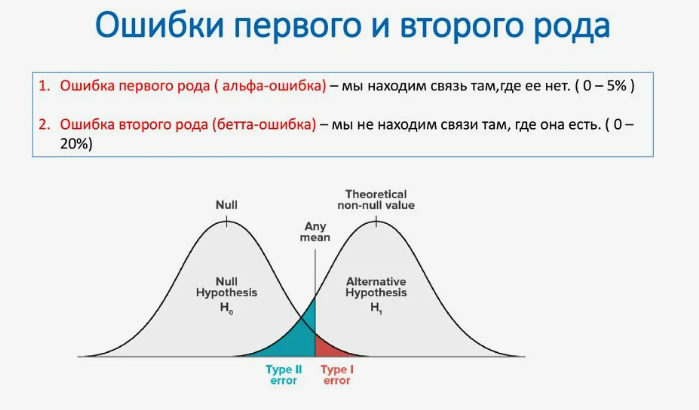

* Ошибка I рода (ложноположительный результат): результат теста говорит, что у вас коронавирус, но на самом деле это не так.

* Ошибка II рода (ложноотрицательный): результат теста говорит, что у вас нет коронавируса, но на самом деле он есть.

**Итог**
* В статистике при проверке гипотез возможны два типа ошибок: первого и второго рода. Ошибка первого рода происходит, когда отвергается нулевая гипотеза, хотя она верна, а ошибка второго рода - когда нулевая гипотеза не отвергается, хотя она ложна.

* Уровень риска ошибки первого рода определяется выбранным уровнем значимости. Это значение, которое устанавливается в начале исследования для оценки статистической вероятности получения результатов (p-value). Если p-value меньше уровня значимости, результат теста считается статистически значимым.

* Уровень значимости часто устанавливается на уровне 0,05, что означает, что вероятность получения таких результатов составляет 5 % или меньше, если нулевая гипотеза верна.

* Для уменьшения вероятности ошибки первого рода можно выбрать более низкий уровень значимости. Однако следует учитывать, что это может повысить вероятность ошибки второго рода, снижая статистическую мощность теста.


Проведение статистического теста состоит из следующих шагов:

1. подготовка таблиц с данными;
2. проверка нормальности распределения (только для параметрических тестов — об этом ниже);
3. формулирование гипотез;
4. вычисления.

Тесты бывают параметрические и непараметрические. Если мы уверены, что данные распределены нормально, — можем проводить параметрические тесты. Если нет — то непараметрические.

тесты на нормальность:
* Тест Шапиро-Уилка оценивает выборку данных и определяет, насколько вероятно, что данные были получены из распределения Гаусса.
* Тест Д’Агостино  вычисляет эксцесс и перекос по данным, чтобы определить, отклоняется ли распределение данных от нормального распределения.
    * Перекос — это количественная оценка того, насколько распределение смещено влево или вправо, мера асимметрии в распределении.
    * Эксцесс количественно определяет, какая часть распределения находится в хвосте.

для проверки данных на нормальность мы используем один из предложенных тестов, вычисляем p-value и затем сравниваем его с установленным альфа.

#### Тест Шапиро-Уилка
1. **Цель**: Проверка нормальности данных.
2. **Метод**: Тест основан на корреляции между данными и соответствующими значениями нормального распределения.
3. **Выходные данные**: Тестовая статистика W и p-значение. Низкие значения W и низкие p-значения указывают на отклонение от нормальности.
4. **Особенности**:
   - Хорошо работает для небольших выборок.
   - Чувствителен к отклонениям от нормальности, особенно для данных с незначительными выбросами.

#### Тест Д’Агостино
1. **Цель**: Проверка нормальности данных.
2. **Метод**: Тест использует статистику на основе третьего и четвертого моментов (асимметрии и эксцесса) распределения данных.
3. **Выходные данные**: Тестовая статистика K^2 и p-значение. Низкие p-значения указывают на отклонение от нормальности.
4. **Особенности**:
   - Хорошо работает для больших выборок.
   - Может быть менее чувствительным к мелким отклонениям от нормальности по сравнению с тестом Шапиро-Уилка.
   - Учитывает как асимметрию, так и эксцесс данных.

#### Сравнение и использование
- **Тест Шапиро-Уилка** предпочтительнее использовать для небольших выборок (например, менее 50 наблюдений). Он чувствителен к малым отклонениям от нормальности и часто используется в медицинских и социальных науках.
- **Тест Д’Агостино** (или его вариант — тест Д’Агостино и Пирсона) лучше применять для больших выборок. Он проверяет распределение на наличие асимметрии и эксцесса, что делает его полезным для более общих случаев.



**Сравнительные тесты** ищут различия между средними параметрами по группам. Их можно использовать для проверки влияния категориальной переменной на среднее значение какой-либо другой характеристики.

T-test
* Тип: параметрический.
* Применяется: когда нужно понять, есть ли различия в среднем значении переменной между двумя группами наблюдений.
* Данные: должны состоять из двух переменных — по одной переменной они делятся на две группы, по другой — сравниваются между собой.
* Нулевая гипотеза: средние значения переменной в двух группах не отличаются значимо.
* Группа наблюдений — это наблюдения с одной общей фиксированной переменной. Допустим, мы собрали данные о домашних животных, потом разделили их на котиков и собачек и теперь с помощью T-теста сравниваем, есть ли различия в том, сколько корма в среднем они едят. В этом случае фиксированной переменной будет видовая принадлежность, а переменной для сравнения — среднее количество корма.

Независимый T-тест проверяет разницу между одной и той же переменной из разных совокупностей (например, сравнение собак и кошек). Стоит отметить, что T-тест используется на выборках размером меньше 30.

В случае, если объём выборки превышает 30, используется z-тест. Для проведения z-теста необходимо владеть информацией о разбросе данных. Таким образом, z-тест используется для определения того, различаются ли рассчитанные средние значения двух выборок в случае, если доступно стандартное отклонение и выборка велика. T-тест используется для определения того, как средние значения различных наборов данных отличаются друг от друга, если стандартное отклонение или дисперсия неизвестны.

Тесты ANOVA и MANOVA используются при сравнении средних значений более чем двух групп (например, среднего роста детей, подростков и взрослых).

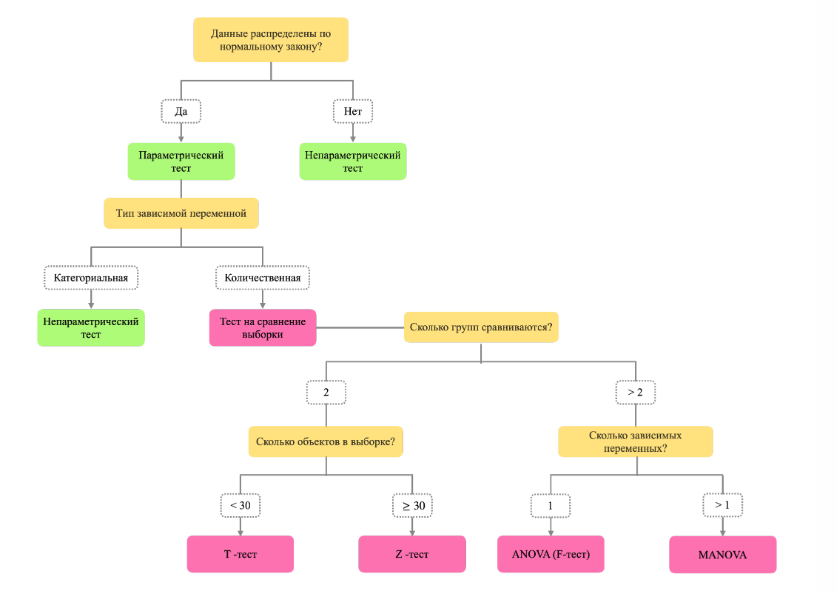

Непараметрические тесты не делают предположений о нормальности данных и не привязаны к типу шкалы измерения признаков.
* Для поиска зависимостей между не гауссовскими или категориальными величинами часто используют тест на корреляцию Спирмена и Хи-квадрат-тест. Критерий хи2  оценивает, являются ли ожидаемые частоты каждой переменной значимо отличающимися от наблюдаемых частот или нет.
* Критерий Уилкоксона используется для сравнения двух независимых выборок путём анализа их медианных значений.
* Критерий Краскела-Уоллиса предназначен для сравнения распределений в нескольких выборках.
* ANOSIM (анализ сходства) — это непараметрический тест на наличие существенных различий между двумя или более группами, основанный на любой мере расстояния.

### Ура, практика...

In [ ]:
# Мы будем использовать информацию о диаметре пицц разных производителей.
!wget https://raw.githubusercontent.com/harika-bonthu/Hypothesis-test-examples/main/pizzas.csv

In [ ]:
data = pd.read_csv('pizzas.csv')
data.head()

In [ ]:
data.rename(columns={'Making Unit 1': 'Пиццерия №1', 'Making Unit 2': 'Пиццерия №2'}, inplace=True)

In [ ]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
alpha = 0.05

#### Тест Шапиро-Уилка
— это статистический тест, который помогает проверить, принадлежит ли набор данных нормально распределенной популяции. Он сравнивает вашу выборку с нормальным распределением; если p-значение теста низкое (как правило, менее 0,05), это указывает на значительное отклонение ваших данных от нормального распределения

In [ ]:
from scipy.stats import shapiro
_, p = shapiro(data)
print('p=%.3f' % p)

# Интерпретация
if p > alpha:
	print(H0)
else:
	print(Ha)

#### Тест Д’Агостино
Тест использует статистику на основе третьего и четвертого моментов (асимметрии и эксцесса) распределения данных.

In [ ]:
from scipy.stats import normaltest
_, p = normaltest(data)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация
if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

#### Независимый T-тест
- проверяет разницу между одной и той же переменной из разных совокупностей

In [ ]:
from scipy.stats import ttest_ind
H0 = 'Нет значимой разницы между диаметрами пиццы в разных пиццериях.'
Ha = 'Есть значимая разница между диаметрами пиццы в разных пиццериях.'

In [ ]:
def t_test(df):
    print('\n' +  "Результаты независимого T-теста")
    test_results = ttest_ind(data['Пиццерия №1'], data['Пиццерия №2'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)

#### Корреляция Спирмана
представляет собой непараметрическую меру статистической зависимости между двумя переменными

In [ ]:
from numpy.random import rand
from scipy.stats import spearmanr

data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)


corr, p = spearmanr(data1, data2)

In [ ]:
print(corr,p)
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

#### ANOVA тест
— это статистический метод, который используется для анализа различий между группами (факторами) и влияния различных переменных (факторов) на исследуемую зависимую переменную. Он позволяет выявить, есть ли статистически значимое влияние одного или нескольких факторов на зависимую переменную, и определить, какие из факторов оказывают наибольшее влияние.

In [ ]:
from scipy.stats import f_oneway

* Однофакторный дисперсионный анализ ANOVA проверяет нулевую гипотезу о том, что две или более групп имеют одинаковое среднее значение генеральной совокупности.
* В качестве данных возьмем информацию по размерам раковины мидий, выращенных в разных местах.

In [ ]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]
_, p = f_oneway(petersburg, magadan, tvarminne)

In [ ]:
H0 = 'Нет значимой разницы между средним размером раковины мидий в трех разных местах.'
Ha = 'Есть значимая разница между средним размером раковины мидий в трех разных местах.'

if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

#### Z-тест
Проведем Z-тест для проверки двух независимых групп данных на равенство средних значений выборок.

In [ ]:
# Скачаем датасет, содержащий информацию по давлению 120 человек.
!wget https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/blood_pressure.csv
data = pd.read_csv('blood_pressure.csv')
data.head()

In [ ]:
from statsmodels.stats import weightstats
_ ,p = weightstats.ztest(data['bp_before'], x2=data['bp_after'], value=0,alternative='two-sided')
print(float(p))


if p < 0.05:
    print("Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.")

#### Z-тест на пропорцию
Z-критерий одной пропорции используется для сравнения наблюдаемой пропорции с теоретической.

В этом тесте используются следующие нулевые гипотезы:

$H_0: p = p_0$ (доля мужчин, предоставивших данные о своем давлении, равна гипотетической пропорции $p_0$)

Альтернативная гипотеза может быть двусторонней, левосторонней или правосторонней:

* $H_1 (двусторонний): p ≠ p_0$ (доля мужчин не равна некоторому гипотетическому значению $p_0$)
* $H_1 (левосторонний): p < p_0$ (доля мужчин меньше некоторого гипотетического значения $p_0$)
* $H_1 (правосторонний): p > p_0$ (доля мужчин больше некоторого гипотетического значения $p_0$)

Предположим, что доля мужчин в нашем датачете равна 40%.

$p_0$: гипотетическая доля мужчин = 0.40

$x$: число мужчин в выборке мужчин: `len(data[data.sex == 'Male'])`

$n$: размер выборки = `len(data)`

Покажем, как использовать функцию `proportions_ztest` для выполнения  **z-теста**:

In [ ]:
p_0 = 0.4
n = len(data)
x = len(data[data.sex == 'Male'])

print(n, x)

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

#perform one proportion z-test
_, p = proportions_ztest(count=x, nobs=n, value=p_0)

In [ ]:
if p < 0.05:
    print("Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу.")

**Небольшая задача:**
* Используя информацию по мидиям Петербурга и Магадана, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
* Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


In [ ]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105, None]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]

mussels_df = pd.DataFrame({
    'petersburg': petersburg,
    'magadan': magadan
})

mussels_df.head()

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределение данных')

sns.kdeplot(mussels_df['petersburg'], ax=ax1, label ='Петербург')
sns.kdeplot(mussels_df['magadan'], ax=ax1, label ='Магадан')

plt.legend()

In [ ]:
# заменим известное нам пустое значение медианным показателем
mussels_df = mussels_df.fillna(mussels_df['petersburg'].median())

In [ ]:
mussels_df.corr()

Для расчёта уровня корреляции выбрана корреляция Пирсона

1. распределение нормальное, с небольшим смещением в право
2. данные не являются категориальными
3. выбросы отсутствуют

Т.к. нас интересует средний размер мидии, тогда :
1. Альтернативная гипотеза: Существует разница между средним размером раковины мидий в Петербурге и Магадане.
2. Нулевая гипотеза: Средний размер раковины мидии в Петербурге и Магадане одинаковый.

Выбор нулевой гипотезы обусловлено тем, что зависимости должны быть уравнены, т.к. по определению нулевая гипотеза предполагает отсутствие разницы между параметрами или распределениями выборки. Так как нет задачи определить какие раковины меньше, а какие больше, то мы ставим гипотезу по принципу "Двусторонний тест".

1. Как видим выше данне распределены нормально
2. Тип количественный (не категориальный)
3. В сравнении 2 группы
4. Объектов в выборке менее 30

Следовательно оптимальный инструмент - Т-тест

In [ ]:
mussels_delta = abs(mussels_df['petersburg'].mean() - mussels_df['magadan'].mean())
print('Разница между средним размером равокины мидии из Петербурга и Магадана составляет: {0:.3f}'.format(mussels_delta))

In [ ]:
# устанавливаем основные параметры, в том числе стандартный размер alpha

H0 = 'Средний размер раковины мидии в Петербурге и Магадане одинаковый'
Ha = 'Существует разница между средним размером раковины мидий в Петербурге и Магадане'

alpha = 0.05

In [ ]:
def t_test(df):
    print('\n' + "Результаты независимого T-теста")
    test_results = ttest_ind(df['petersburg'], df['magadan'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(mussels_df)

Выводы:
1. Согласно произведенных расчётов, низкий уровень корреляции указывает на отсутствие взаимосвязи между размером раковины мидий в Санкт-Петербурге и Магадане;
2. Мы подтвердили гипотезу, что существует разница между средним размером раковины мидий в Петербурге и Магадане;
3. Гипотеза является истинной т.к. **P-value** (вероятность обнаружения наблюдаемых результатов, когда нулевая гипотеза ($H_0$) верна.) соответствует нулю.
